# ANÁLISIS DE PERFUSIÓN CEREBRAL Y EL DETERIORO COGNITIVO EN LA DIABETES TIPO 2

Descripción del experimento:
Estudio transversal, unicéntrico que investiga los mecanismos por los cuales la Diabetes Mellitus tipo 2 (DM2) afecta la perfusión cerebral y cómo el control deficiente de la glucemia contribuye al deterioro cognitivo en adultos mayores.

## Objetivos Principales
El objetivo general era determinar cómo la DM2 afecta la perfusión cerebral y cómo el control deficiente de la enfermedad contribuye al deterioro cognitivo en adultos mayores

- **Hipótesis 1:** La DM2 se asocia con una enfermedad microvascular cerebral, manifestada como deterioro de la vasorregulación y la distribución del flujo sanguíneo, anomalías de la sustancia blanca en la RM (Resonancia Magnética), y menor rendimiento cognitivo.
- **Hipótesis 2:** El mal control glucémico (niveles altos de HbA1c) aumenta la gravedad de la enfermedad microvascular y está asociado con una reducción del flujo sanguíneo cerebral, más cambios en la sustancia blanca (WMC) ydisfunción ejecutiva.


## Participantes
Se reclutó un total de 140 sujetos del área de Boston

- **Grupo Diabetes:** 70 hombres y mujeres de 50 a 85 años diagnosticados con DM2 y tratados por más de un año.
- **Grupo Control:** 70 sujetos sanos de la misma edad, sin enfermedades cardiovasculares, renales o neurológicas sistémicas (aparte de hipertensión controlada), con glucosa y HbA1c normales.

Se excluyeron sujetos con DM tipo 1, antecedentes de ACV (accidente cerebrovascular) importante o demencia, estenosis carotídea > 50%, arritmias o hipertensión grave (sistólica >200 y/o diastólica >110 mm Hg).


## Protocolo de Medición (Admisión de 2 Días)
El protocolo experimental completo se realizó con supervisión médica continua en el General Clinical Research Center (GCRC).

### 1. Pruebas Iniciales (Screening y Casa)
- **Análisis de Sangre:** Glucosa, HbA1c, perfil lipídico, y marcadores de inflamación y endotelio (ej., CRP, ICAM-1).
- **Monitoreo de PA en Casa:** Los sujetos hipertensos monitorizaron su presión arterial (PA) 4 veces al día para establecer una línea base.

### 2. Día 1 - Admisión al GCRC
- **Examen físico y neurológico**, **imágenes retinianas** (para documentar retinopatía diabética)
- **Pruebas Cognitivas:** Se administró una amplia batería de pruebas psicométricas que incluían:
    - **Función Ejecutiva:** Fluidez Verbal, Trail Making Test (Parte A y B), Clock-in-a-Box (CIB).
      - **Atención y Memoria Inmediata:** Digit Span (Forward y Backward)
      - **Aprendizaje y Memoria:** Hopkins Verbal Learning Test - Revised (HVLT-R) y Rey-Osterreith Complex Figure (ROCF).
      - **Estado Cognitivo Global:** Mini-Mental State Examination (MMSE).
- **Marcha y Equilibrio:** Prueba de caminata de 12 minutos con medición continua de la distribución de la presión del pie (FPD) utilizando plantillas con sensores (Pedar Mobile).
- **Monitoreo Nocturno:** Monitorización de la frecuencia cardíaca durante la noche (Holter) para evaluar la calidad del sueño y la función autonómica.

### 3. Día 2 - Pruebas Cerebrovasculares y RM
- **Restricción de Medicamentos:** Los medicamentos antihipertensivos y anticolinérgicos se suspendieron en la mañana antes de las pruebas de Doppler Transcraneal (TCD) y la RM.
- **Estudio de Doppler Transcraneal (TCD):** Se monitorizó la velocidad del flujo sanguíneo (BFV) en la arteria cerebral anterior (ACA) y media (MCA).Se realizaron maniobras para evaluar la vasorregulación cerebral:
  - **Hiperventilación y reinhalación de CO2:** Para evaluar el rango y la reactividad vasomotora cerebral al cambio de CO2.
  - **Maniobra de Valsalva, inclinación (Head-up tilt) y prueba de sentarse a pararse (Sit-to-stand):** Para evaluar la dinámica de la autorregulación cerebral y el equilibrio.
  - **Resonancia Magnética (RM) 3 Tesla:** Se adquirieron varias imágenes cerebrales:Imágenes T1 y T2-weighted, FLAIR y Angiografía por RM (TOF).
  - **Imágenes de Tensor de Difusión (DTI):** Para reconstruir y evaluar tractos de sustancia blanca (proyección, comisural y asociación) y cuantificar Anisotropía Fraccional (FA), difusividad, etc..
  - **Imágenes de Perfusión (CASL):** Para cuantificar mapas de Flujo Sanguíneo Cerebral (CBF) global y regional y determinar la distribución del volumen de Cambios en la Sustancia Blanca (WMC). 

In [39]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

#archivo principal
FILE_NAME =  r"C:/Users/nicol/OneDrive/Documentos/GitHub/Neurociencias-2026-1/S06_proyecto/cerebral-perfusion-and-cognitive-decline-in-type-2-diabetes-1.0.1/data_description/GE-75_data_summary_table.csv" 


# Carga y Preparación de Datos 
try:
    # Asegúrate de usar la ruta y el encoding correctos aquí
    df = pd.read_csv(FILE_NAME, encoding='latin1') 
    # Normalizar (quitar espacios innecesarios en los nombres de columna)
    df.columns = df.columns.str.strip() 
    print(f"Archivo '{FILE_NAME}' cargado con éxito. Filas: {len(df)}")
except Exception as e:
    print(f"Error al cargar el archivo: {e}")
    df = pd.DataFrame()


if not df.empty:
    # 1.1 Filtrar Sujetos y Grupo
    df_filtered = df[df['Group'].isin(['DM', 'CONTROL'])].copy()
    
    
    
    #Selección de Variables Clave (Nodos y Targets) 

# Lista de variables cerebrales 
brain_cols = [
    # 1. Globales y Vasculares 
    'global GM vol',                      
    'global WM vol',                      
    'Perfusion Vascular (whole brain) - hyperventialtion 1 Whole', 
    'Perfusion Vascular (MCA Perf) - hyperventialtion 1 Whole',    
    'Perfusion Vascular (ACA Perf) -  hyperventialtion 1 Whole',   
    'L Frontal Lobe WMHs / ICV',           
    'R Frontal Lobe WMHs / ICV',           
    
    # 2. Regiones Focales Clave 
    'L hippocampus (#165) GM', 'R hippocampus (#166) GM',               
    'L parahippocampal gyrus (#87) GM', 'R parahippocampal gyrus (#88) GM', 
    'L putamen (#163) GM', 'R putamen (#164) GM',                    
    'L caudate (#161) GM', 'R caudate (#162) GM',                     
    'L superior frontal gyrus (#21) GM', 'R superior frontal gyrus (#22) GM', 
    'L middle frontal gyrus (#23) GM', 'R middle frontal gyrus (#24) GM',    
    'L inferior frontal gyrus (#25) GM', 'R inferior frontal gyrus (#26) GM',  
    'L precentral gyrus (#27) GM', 'R precentral gyrus (#28) GM',      
    'L postcentral gyrus (#41) GM', 'R postcentral gyrus (#42) GM',     
    
    # 3. Materia Blanca y Lesión Focal 
    'L superior frontal gyrus (#21) WM', 'R superior frontal gyrus (#22) WM', 
    'L middle frontal gyrus (#23) WM', 'R middle frontal gyrus (#24) WM',    
    'L inferior frontal gyrus (#25) WM', 'R inferior frontal gyrus (#26) WM',
    
    'L Temporal Lobe WMHs / ICV', 'R Temporal Lobe WMHs / ICV',             
    'L Parietal Lobe WMHs / ICV', 'R Parietal Lobe WMHs / ICV',             
    'L cingulate gyrus (#121) WM', 'R cingulate gyrus (#122) WM',               
    'L Occipital Lobe WMHs / ICV', 'R Occipital Lobe WMHs / ICV'                
]
           
   

    # Identificar variables de rendimiento cognitivo (Targets)
cognitive_cols = [
    # 1. Memoria Verbal 
    'HVLT: Total Recall T-score',      # Memoria Episódica Total
    'HVLT: Delayed Recall T-score',    # Retención de la memoria a largo plazo
    
    # 2. Función Ejecutiva y Velocidad 
    'TM: Part B Time (sec)',           # Test del Trazo B (Velocidad + Flexibilidad Cognitiva)
    'VF: FAS Total',                   # Fluidez Verbal Semántica/Fonémica (Función Ejecutiva)
    'Clock: Total Score',             
    
    # 3. Cribado General 
    'MMSE Total',                       # Examen Mini-Mental (Visión general del estado cognitivo)
    
    # 4. Atención/Concentración 
    'TM: Part A Time (sec)'            # Test del Trazo A (Solo Velocidad de Procesamiento/Atención)
]
    
    # Lista completa de variables a usar
all_cols= ['patient ID', 'Group'] + brain_cols + cognitive_cols

df_analysis = df_filtered[all_cols].set_index('patient ID') 

    # Imputación de Valores Faltantes (NaN)
df_analysis.fillna(df_analysis.mean(numeric_only=True), inplace=True)
print("   -> Valores NaN imputados con la media.")

    # Separar los DataFrames por grupo
df_DM = df_analysis[df_analysis['Group'] == 'DM'].drop(columns=['Group'])
df_CONTROL = df_analysis[df_analysis['Group'] == 'CONTROL'].drop(columns=['Group'])

Archivo 'C:/Users/nicol/OneDrive/Documentos/GitHub/Neurociencias-2026-1/S06_proyecto/cerebral-perfusion-and-cognitive-decline-in-type-2-diabetes-1.0.1/data_description/GE-75_data_summary_table.csv' cargado con éxito. Filas: 88
   -> Valores NaN imputados con la media.


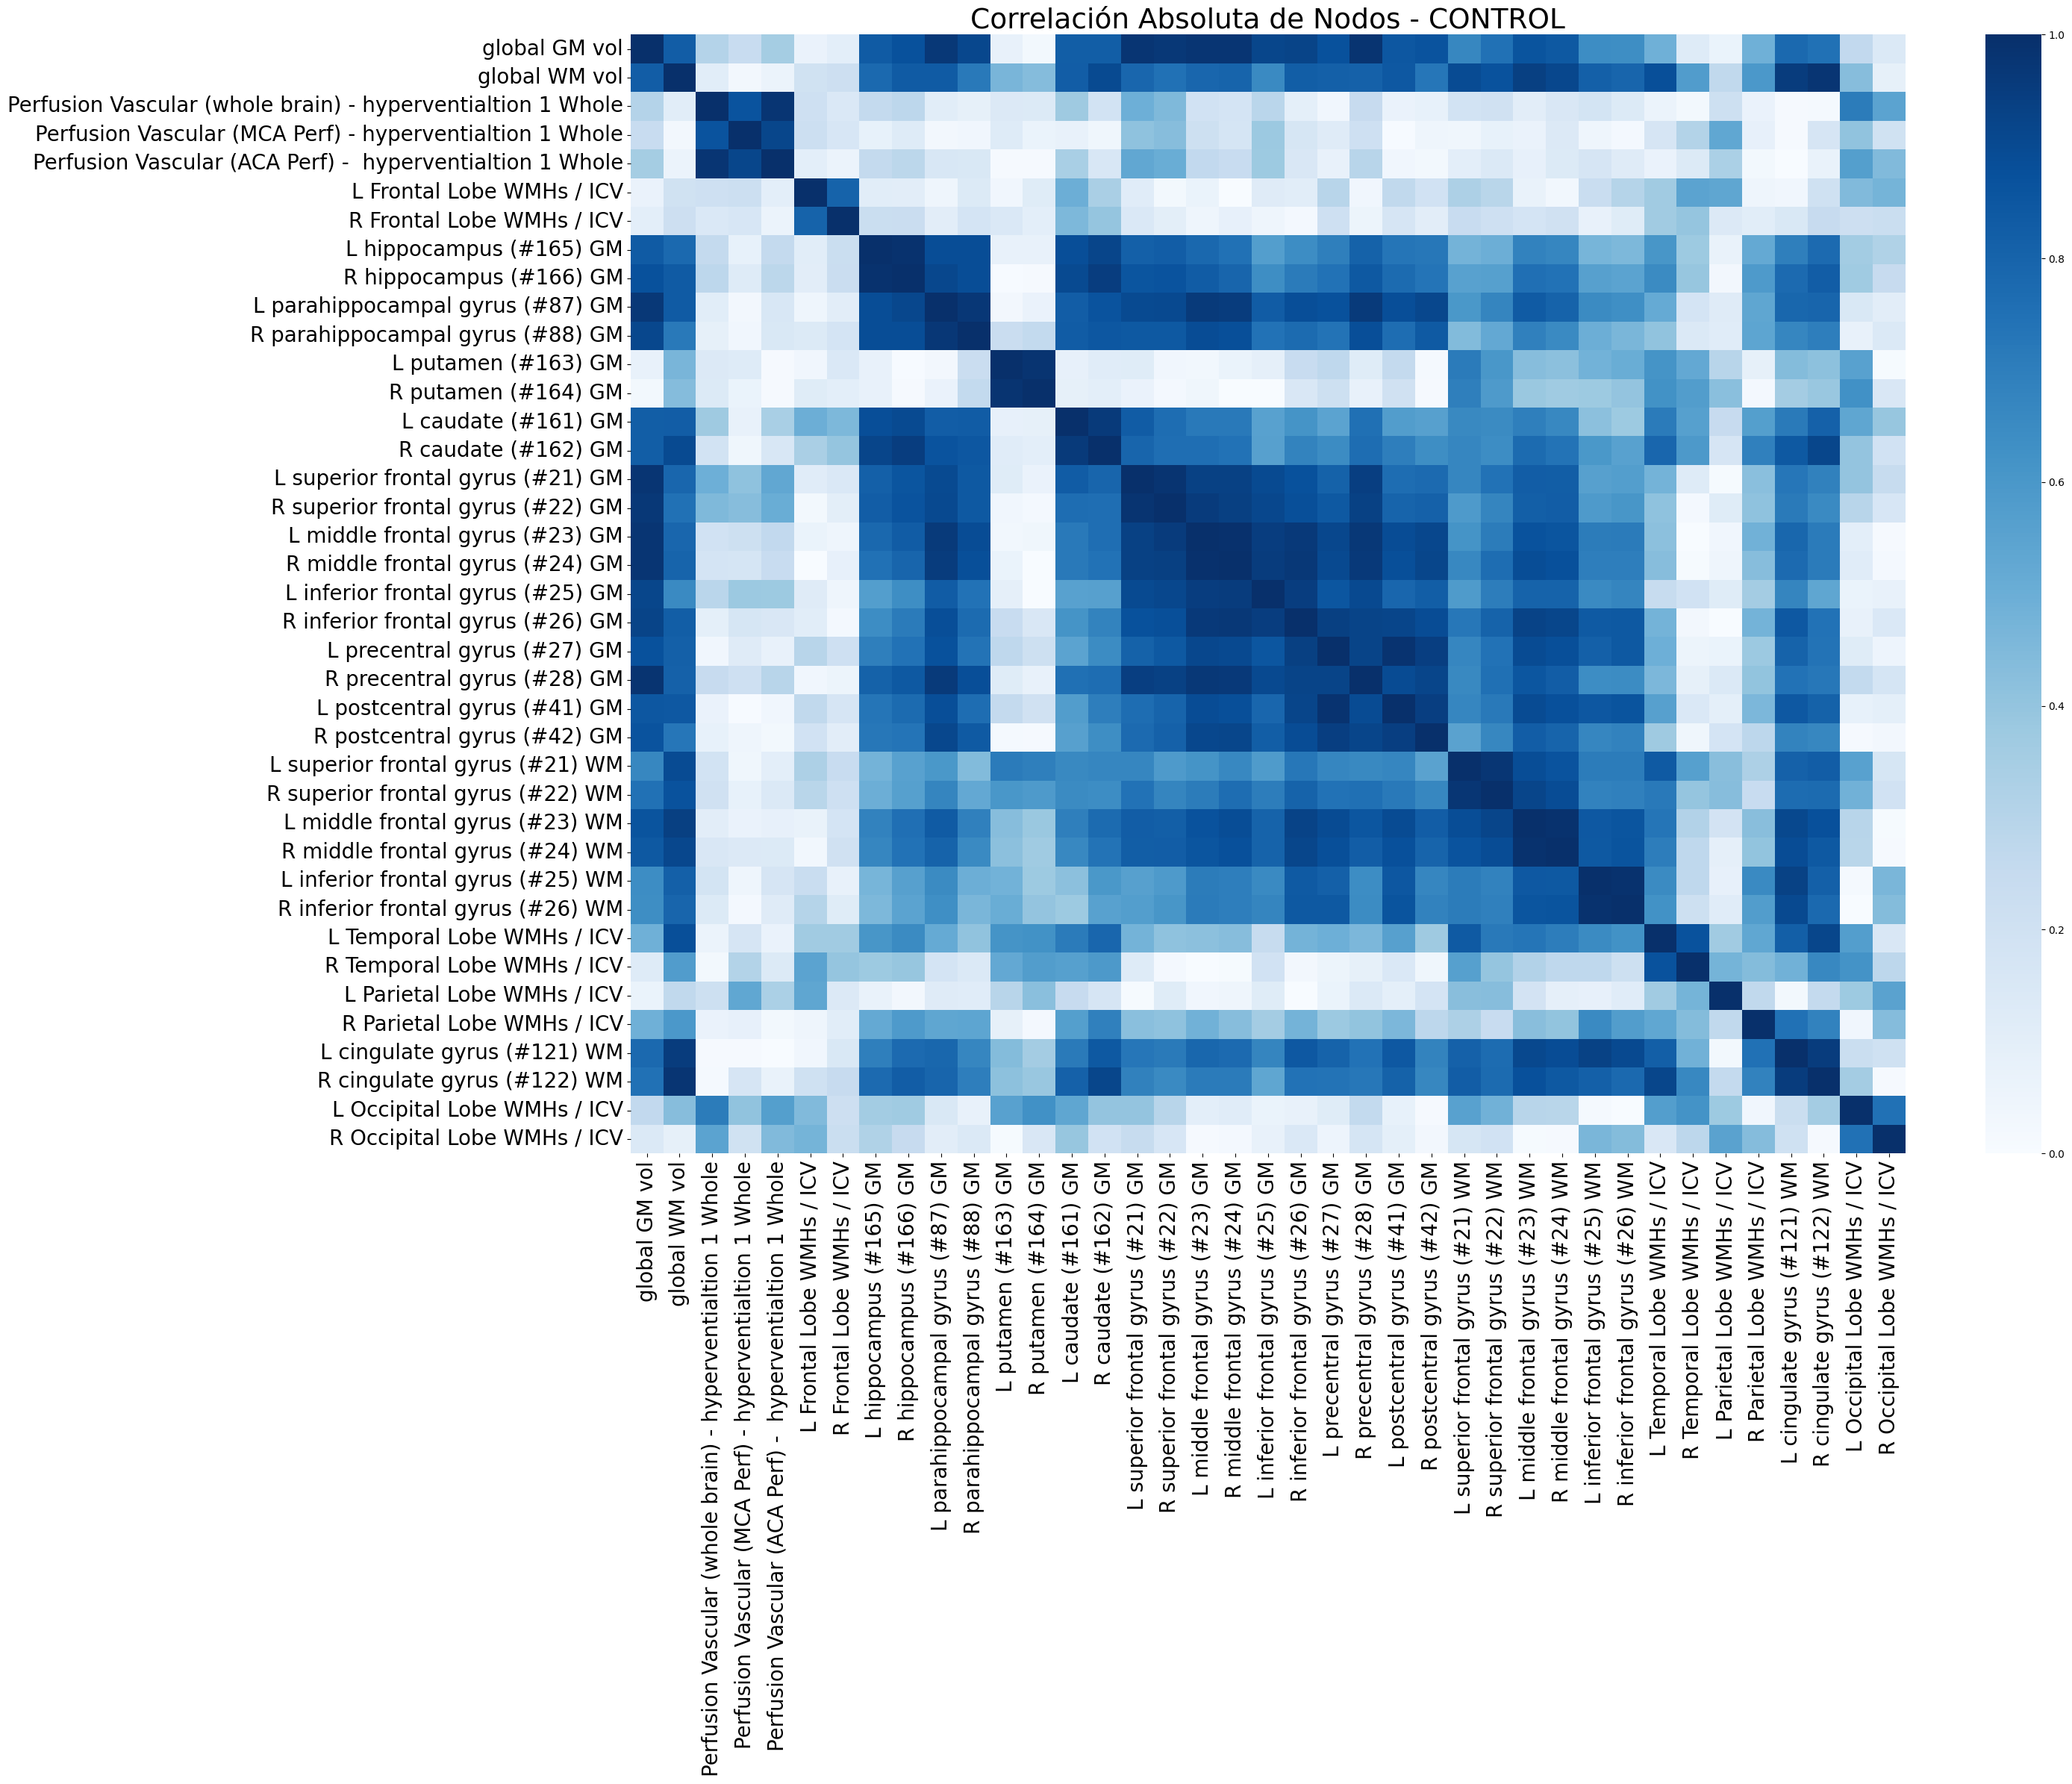

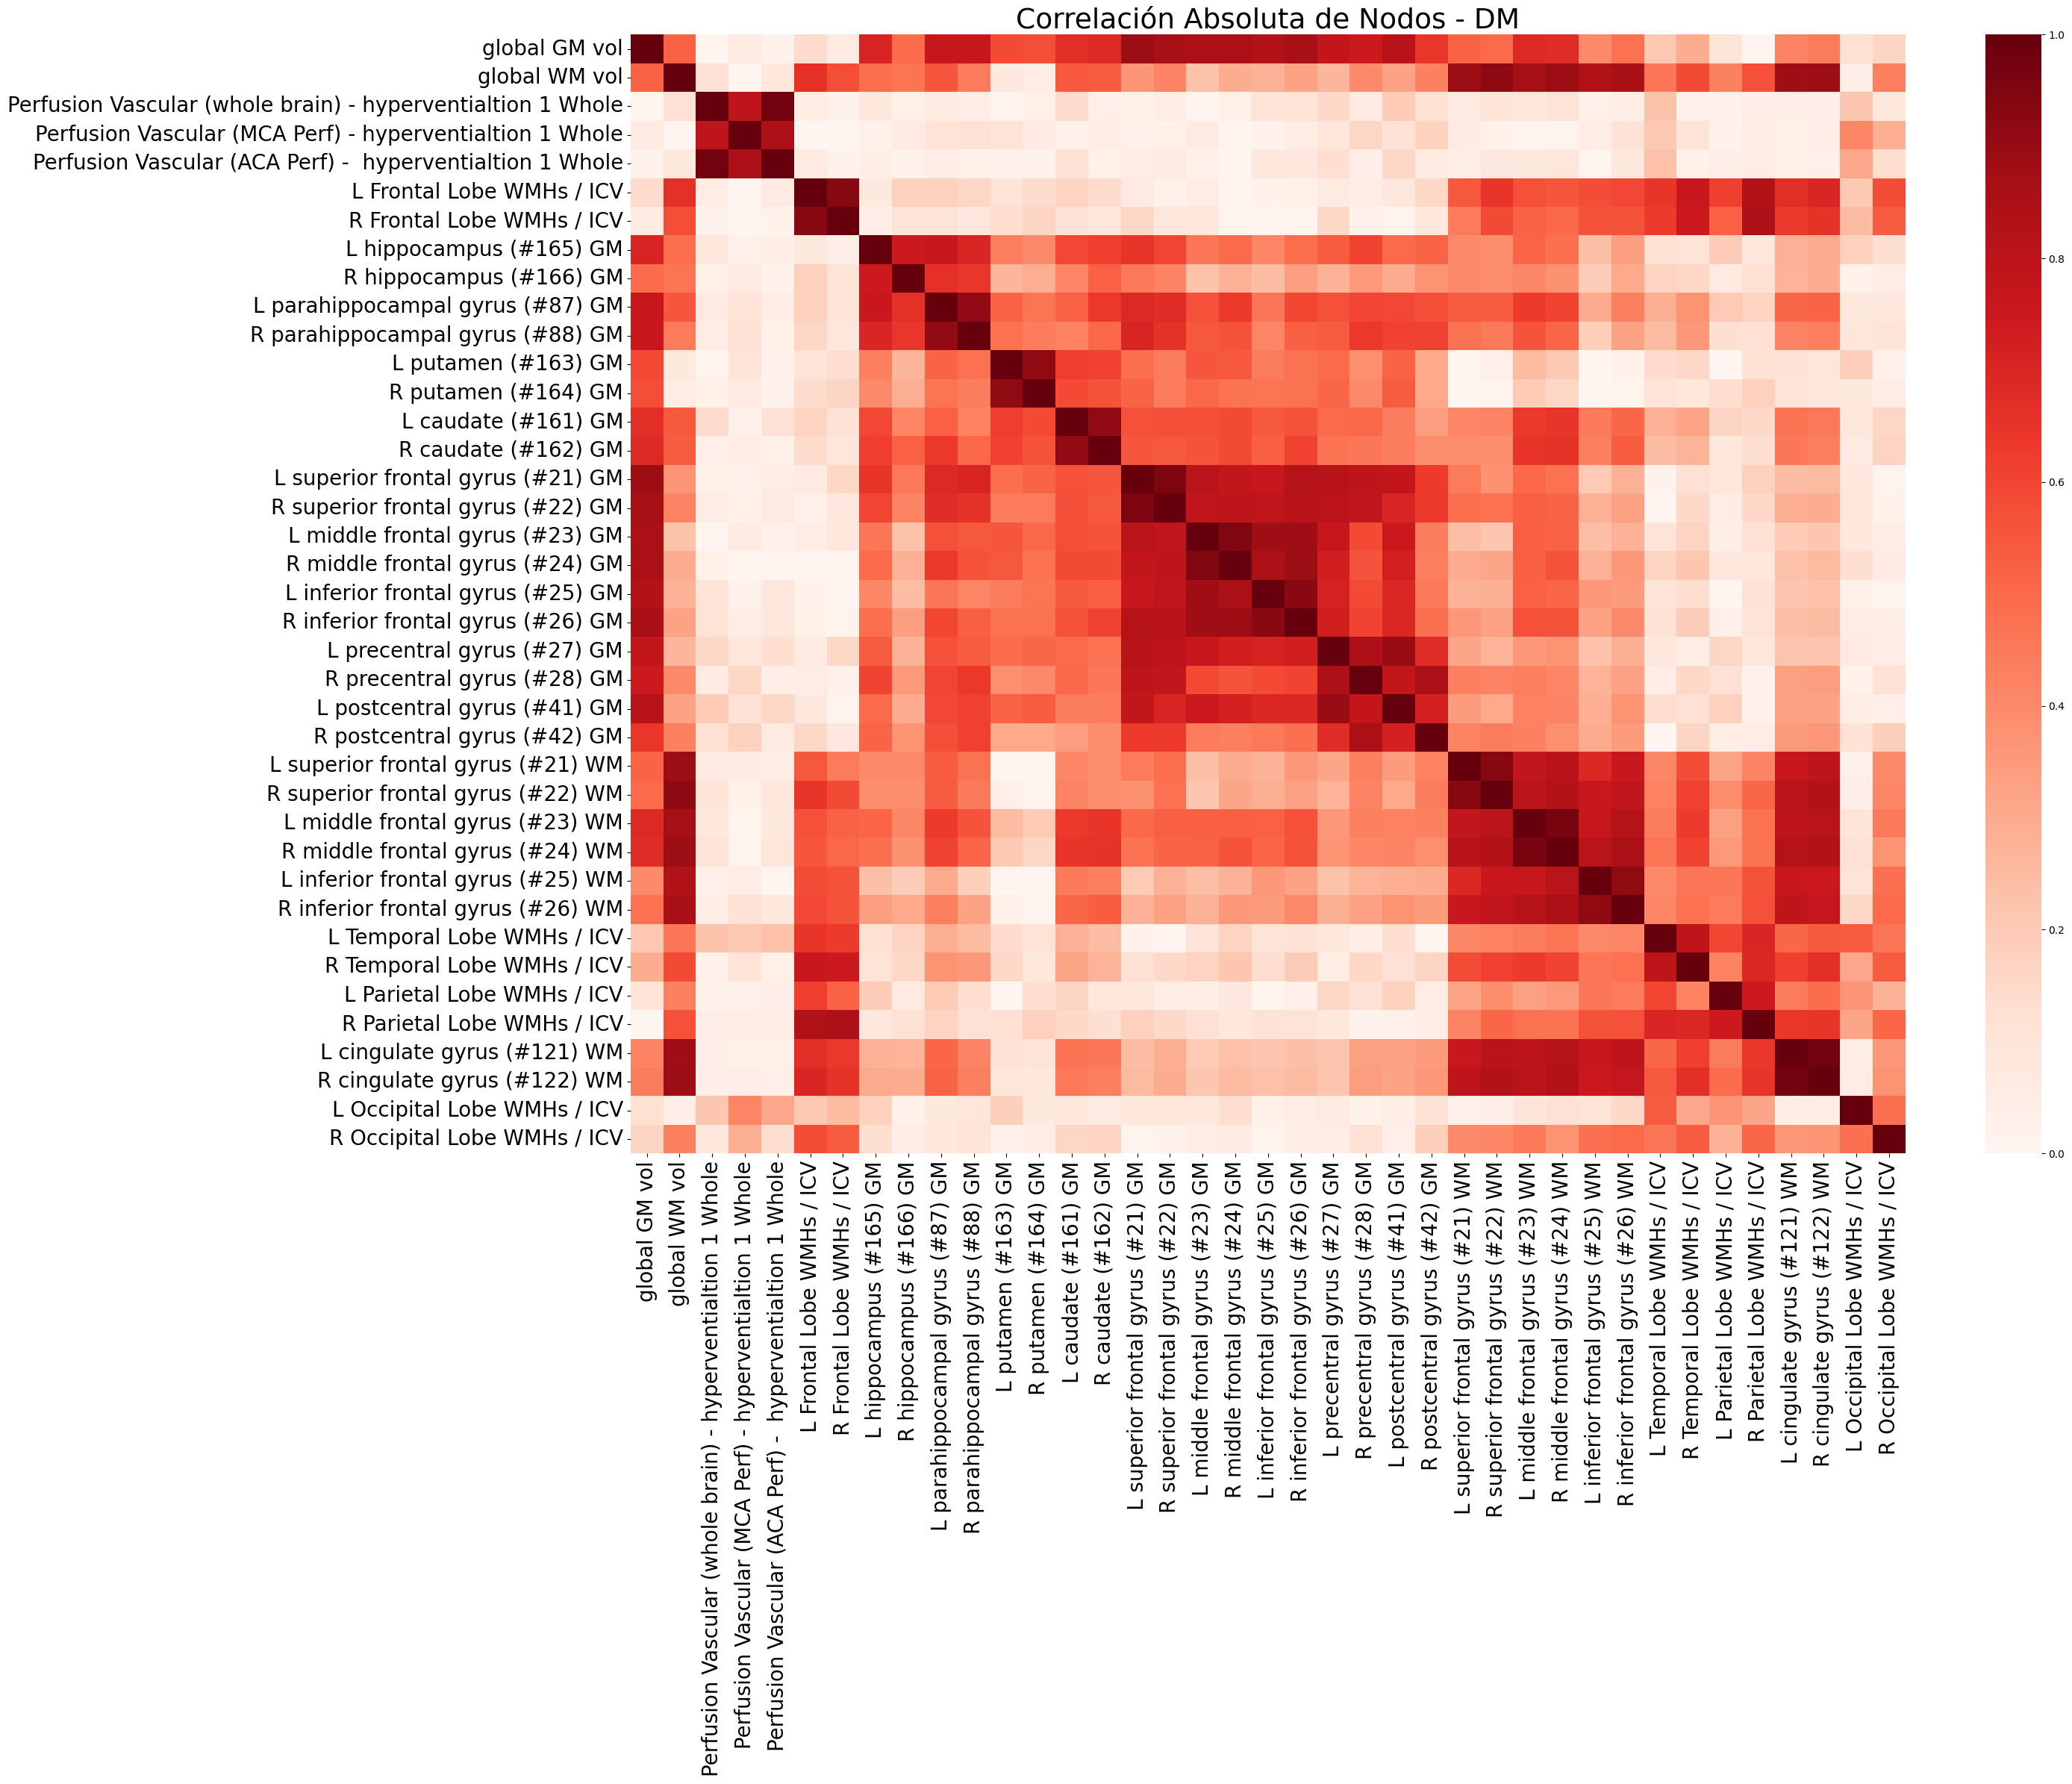

In [40]:
plt.figure(figsize=(30, 24))

sns.heatmap(
    df_corr_CONTROL.abs(),
    annot=False,
    cmap='Blues',
    vmin=0, vmax=1,
    cbar=True
)

plt.title("Correlación Absoluta de Nodos - CONTROL", fontsize=27)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 1])
plt.savefig("heatmap_CONTROL.png", dpi=300, bbox_inches="tight")
plt.show()
plt.close()

plt.figure(figsize=(30, 24))

sns.heatmap(
    df_corr_DM.abs(),
    annot=False,
    cmap='Reds',
    vmin=0, vmax=1,
    cbar=True
)

plt.title("Correlación Absoluta de Nodos - DM", fontsize=27)
plt.xticks(rotation=90, fontsize=20)
plt.yticks(rotation=0, fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 1])  # evita recortes internos
plt.savefig("heatmap_DM.png", dpi=300, bbox_inches="tight")  # evita recorte externo
plt.show() 
plt.close()

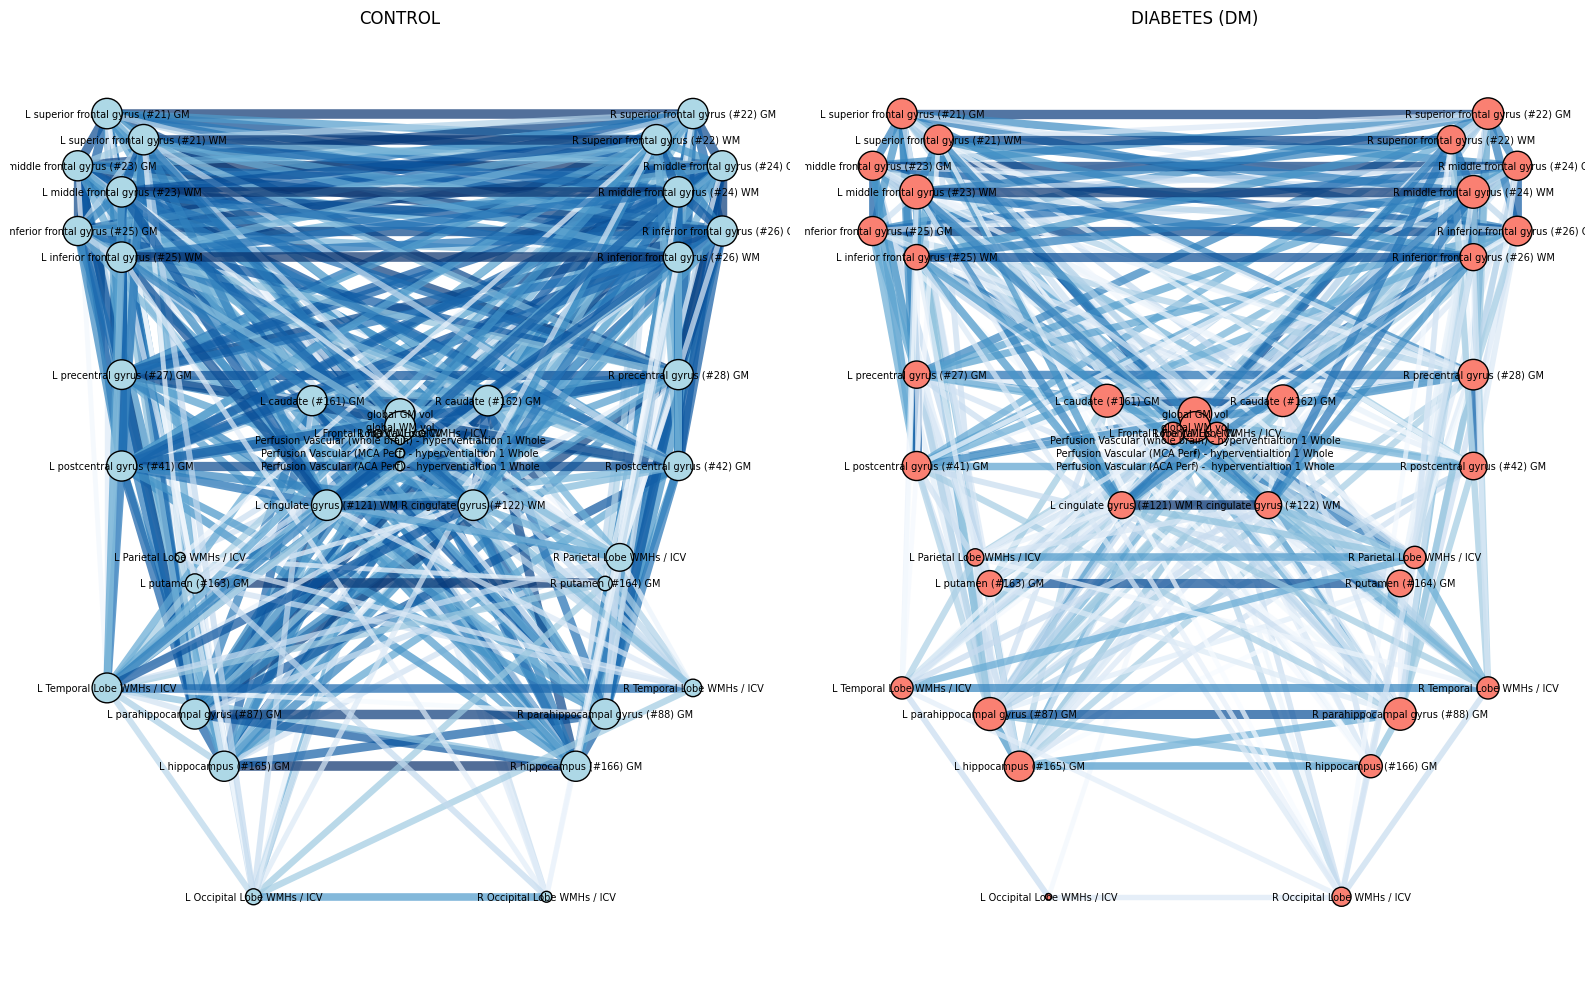

In [69]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# -------- CONFIGURACIÓN GENERAL ----------
threshold_compare = 0.05   # diferencia mínima para mostrar cambio
max_width = 6              # grosor máximo de líneas
node_scale = 2500          # escala del tamaño del nodo

# ---------- POSICIÓN ANATÓMICA ----------
def anatomical_layout(G):
    pos = {}
    y_positions = {}
    
    for node in G.nodes():
        if not node.startswith(("L ", "R ")):
            pos[node] = (0, np.random.uniform(0,1))
            continue

        base = node[2:].strip()
        if base not in y_positions:
            y_positions[base] = np.random.uniform(0, 1)

        if node.startswith("L "):
            pos[node] = (-1, y_positions[base])
        else:
            pos[node] = (1, y_positions[base])

    return pos

pos = anatomical_layout(G_DM)

# ---------- CENTRALIDAD ----------
centrality_DM = nx.eigenvector_centrality(G_DM)
centrality_CTRL = nx.eigenvector_centrality(G_CONTROL)

node_size_DM = [centrality_DM[n] * node_scale for n in G_DM.nodes()]
node_size_CTRL = [centrality_CTRL[n] * node_scale for n in G_CONTROL.nodes()]

# ---------- GRAFO INDIVIDUAL ----------
def draw_single_graph(G, pos, node_sizes, title, color_map):
    edges = G.edges(data=True)
    weights = [d["weight"] for (_, _, d) in edges]

    widths = [1 + w * max_width for w in weights]

    nx.draw_networkx_nodes(
        G, pos,
        node_size=node_sizes,
        node_color=color_map,
        edgecolors="black"
    )

    nx.draw_networkx_edges(
        G, pos,
        width=widths,
        edge_color=weights,
        edge_cmap=plt.cm.Blues,
                alpha=0.7
    )

    nx.draw_networkx_labels(G, pos, font_size=7)
    plt.title(title)
    plt.axis("off")

pos = {
    # ---------- 1. REGIONES GLOBALES ----------
    'global GM vol': (0, 0.9),
    'global WM vol': (0, 0.8),
    'Perfusion Vascular (whole brain) - hyperventialtion 1 Whole': (0, 0.7),
    'Perfusion Vascular (MCA Perf) - hyperventialtion 1 Whole': (0, 0.6),
    'Perfusion Vascular (ACA Perf) -  hyperventialtion 1 Whole': (0, 0.5),
    'L Frontal Lobe WMHs / ICV': (-0.3, 0.75),
    'R Frontal Lobe WMHs / ICV': (0.3, 0.75),
    # ---------- 2. HIPOCAMPO / PARAHIPOCAMPO ----------
    'L hippocampus (#165) GM': (-2.4, -1.8),
    'R hippocampus (#166) GM': ( 2.4, -1.8),

    'L parahippocampal gyrus (#87) GM': (-2.8, -1.4),
    'R parahippocampal gyrus (#88) GM': ( 2.8, -1.4),

    # ---------- 3. NÚCLEOS BASALES ----------
    'L putamen (#163) GM': (-2.8, -0.4),
    'R putamen (#164) GM': ( 2.8, -0.4),

    'L caudate (#161) GM': (-1.2, 1.0),
    'R caudate (#162) GM': ( 1.2, 1.0),

    # ---------- 4. FRONTAL (GM) ----------
    'L superior frontal gyrus (#21) GM': (-4.0, 3.2),
    'R superior frontal gyrus (#22) GM': ( 4.0, 3.2),

    'L middle frontal gyrus (#23) GM': (-4.4, 2.8),
    'R middle frontal gyrus (#24) GM': ( 4.4, 2.8),

    'L inferior frontal gyrus (#25) GM': (-4.4, 2.3),
    'R inferior frontal gyrus (#26) GM': ( 4.4, 2.3),
     'L precentral gyrus (#27) GM': (-3.8, 1.2),
    'R precentral gyrus (#28) GM': ( 3.8, 1.2),

    'L postcentral gyrus (#41) GM': (-3.8, 0.5),
    'R postcentral gyrus (#42) GM': ( 3.8, 0.5),

    # ---------- 5. FRONTAL (WM) ----------
    'L superior frontal gyrus (#21) WM': (-3.5, 3.0),
    'R superior frontal gyrus (#22) WM': ( 3.5, 3.0),

    'L middle frontal gyrus (#23) WM': (-3.8, 2.6),
    'R middle frontal gyrus (#24) WM': ( 3.8, 2.6),

    'L inferior frontal gyrus (#25) WM': (-3.8, 2.1),
    'R inferior frontal gyrus (#26) WM': ( 3.8, 2.1),

    # ---------- 6. WMHs FOCAL ----------
    'L Temporal Lobe WMHs / ICV': (-4.0, -1.2),
    'R Temporal Lobe WMHs / ICV': ( 4.0, -1.2),

    'L Parietal Lobe WMHs / ICV': (-3.0, -0.2),
    'R Parietal Lobe WMHs / ICV': ( 3.0, -0.2),

    'L cingulate gyrus (#121) WM': (-1.0, 0.2),
     'R cingulate gyrus (#122) WM': ( 1.0, 0.2),

    'L Occipital Lobe WMHs / ICV': (-2.0, -2.8),
    'R Occipital Lobe WMHs / ICV': ( 2.0, -2.8)

}

# ----------------- FIGURA FINAL -----------------
plt.figure(figsize=(24, 10))

plt.subplot(1, 3, 1)
draw_single_graph(G_CONTROL, pos, node_size_CTRL, "CONTROL", "lightblue")

plt.subplot(1, 3, 2)
draw_single_graph(G_DM, pos, node_size_DM, "DIABETES (DM)", "salmon")


plt.tight_layout()
plt.savefig("red_cerebral.png", bbox_inches="tight")
plt.show()

Comparación de Métricas Globales (DM vs CONTROL) ---
Métrica                   CONTROL    DM         Diferencia (DM-C)
-------------------------------------------------------
Density                   0.5884     0.4696     -0.1188        
Average Path Length       1.4197     1.9123     +0.4926        
Clustering Coefficient    0.8245     0.8061     -0.0184        
Top 3 Hubs (Centralidad de Intermediación) ---

Grupo CONTROL (Organización Típica):
L caudate (#161) GM                 0.082
L superior frontal gyrus (#21) GM   0.057
R superior frontal gyrus (#22) GM   0.052

Grupo DM (Hubs Modificados/Comprometidos):
L Occipital Lobe WMHs / ICV                                0.149
L Temporal Lobe WMHs / ICV                                 0.118
Perfusion Vascular (MCA Perf) - hyperventialtion 1 Whole   0.102


C:\Users\nicol\AppData\Local\Temp\ipykernel_24536\3564470416.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Delta_Centrality', y=df_desorganizacion.index, data=df_desorganizacion, palette='coolwarm')


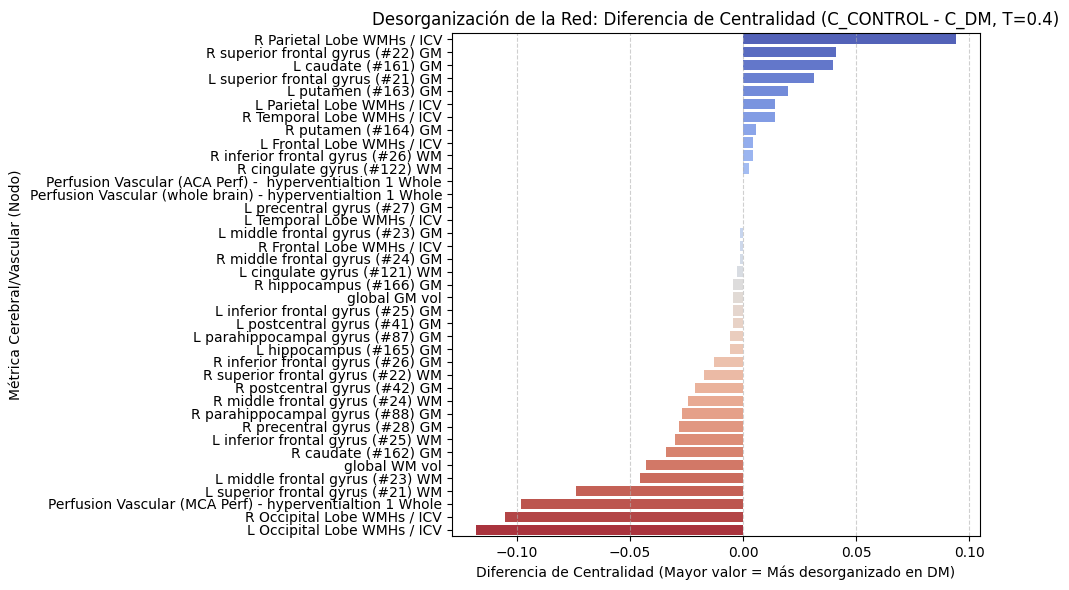


CONCLUSIONES CLAVE DE LA DESORGANIZACIÓN
**1. Mayor Desorganización (Fallo de Integración):**
   -> El nodo más afectado y menos central en DM es **R Parietal Lobe WMHs / ICV** con una diferencia de Centralidad de **0.094** (Pérdida de rol de puente).

**2. Posible Compensación/Reorganización:**
   -> El nodo **L Occipital Lobe WMHs / ICV** es **ligeramente más central** en el grupo DM, con una diferencia de **-0.118**. Esto sugiere una reorganización o esfuerzo compensatorio.


In [70]:
#Análisis de Componentes de la Red 

# Función para calcular y comparar métricas clave
def get_graph_metrics(G):
    
    metrics = {}
    
    #Medidas Globales
    metrics['Average Path Length'] = nx.average_shortest_path_length(G)
    metrics['Clustering Coefficient'] = nx.average_clustering(G)
    metrics['Density'] = nx.density(G)
    
    #Medidas de Centralidad
    metrics['Betweenness Centrality'] = nx.betweenness_centrality(G)
    metrics['Degree Centrality'] = nx.degree_centrality(G)
    
    return metrics

metrics_DM = get_graph_metrics(G_DM)
metrics_CONTROL = get_graph_metrics(G_CONTROL)

# 3.3 Comparación de Métricas Globales
print("Comparación de Métricas Globales (DM vs CONTROL) ---")
print(f"{'Métrica':<25} {'CONTROL':<10} {'DM':<10} {'Diferencia (DM-C)':<15}")
print("-" * 55)

for key in ['Density', 'Average Path Length', 'Clustering Coefficient']:
    diff = metrics_DM[key] - metrics_CONTROL[key]
    print(f"{key:<25} {metrics_CONTROL[key]:<10.4f} {metrics_DM[key]:<10.4f} {diff:<+15.4f}")

# Identificación de Hubs Clave
print("Top 3 Hubs (Centralidad de Intermediación) ---")

# Convertir la centralidad a un DataFrame para fácil visualización
df_centrality_DM = pd.Series(metrics_DM['Betweenness Centrality']).sort_values(ascending=False).head(3)
df_centrality_CONTROL = pd.Series(metrics_CONTROL['Betweenness Centrality']).sort_values(ascending=False).head(3)

print("\nGrupo CONTROL (Organización Típica):")
print(df_centrality_CONTROL.to_string(float_format='%.3f'))
print("\nGrupo DM (Hubs Modificados/Comprometidos):")
print(df_centrality_DM.to_string(float_format='%.3f'))

# Asumiendo T_final = 0.4
T_final = 0.4
G_DM = create_brain_graph(df_DM, brain_cols, threshold=T_final)
G_CONTROL = create_brain_graph(df_CONTROL, brain_cols, threshold=T_final)

# Calcular Centralidad de Intermediación (Entre los Nodos del Giant Component)
# Nota: Usamos G.subgraph(...) para calcular métricas de Centralidad solo en el componente principal.

# CENTRALIDAD CONTROL
components_c = list(nx.connected_components(G_CONTROL))
G_CONTROL_GC = G_CONTROL.subgraph(max(components_c, key=len)).copy()
# Calculamos la Centralidad en el GC
centrality_control = nx.betweenness_centrality(G_CONTROL_GC, weight='weight') 

# CENTRALIDAD DM
components_dm = list(nx.connected_components(G_DM))
G_DM_GC = G_DM.subgraph(max(components_dm, key=len)).copy()
# Calculamos la Centralidad en el GC
centrality_dm = nx.betweenness_centrality(G_DM_GC, weight='weight')

# Convertir a DataFrames para la comparación
df_centrality_control = pd.DataFrame.from_dict(centrality_control, orient='index', columns=['C_CONTROL'])
df_centrality_dm = pd.DataFrame.from_dict(centrality_dm, orient='index', columns=['C_DM'])

# Unir los resultados y rellenar NaN con 0 (si un nodo no está en el GC de un grupo)
df_comparison = df_centrality_control.join(df_centrality_dm, how='outer').fillna(0)

# Calcular la diferencia de Centralidad (La medida de la Desorganización)
df_comparison['Delta_Centrality'] = df_comparison['C_CONTROL'] - df_comparison['C_DM']

# Ordenar por la diferencia más grande (los nodos más afectados)
df_desorganizacion = df_comparison.sort_values(by='Delta_Centrality', ascending=False)

# --- Visualización de la Desorganización (Gráfico de Barras) ---

plt.figure(figsize=(10, 6))
# Gráfico de barras horizontales para mejor lectura de nombres largos
sns.barplot(x='Delta_Centrality', y=df_desorganizacion.index, data=df_desorganizacion, palette='coolwarm')
plt.title(f'Desorganización de la Red: Diferencia de Centralidad (C_CONTROL - C_DM, T={T_final})', fontsize=12)
plt.xlabel('Diferencia de Centralidad (Mayor valor = Más desorganizado en DM)')
plt.ylabel('Métrica Cerebral/Vascular (Nodo)')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("")

# 1. Identificar el Hub más Desorganizado (Máxima Delta C Positiva)
max_desorganizacion_node = df_desorganizacion.iloc[0].name
max_desorganizacion_value = df_desorganizacion.iloc[0]['Delta_Centrality']

# 2. Identificar la Posible Compensación (Mínima Delta C Negativa)
min_desorganizacion_node = df_desorganizacion.iloc[-1].name
min_desorganizacion_value = df_desorganizacion.iloc[-1]['Delta_Centrality']

print("CONCLUSIONES CLAVE DE LA DESORGANIZACIÓN")
print(f"**1. Mayor Desorganización (Fallo de Integración):**")
print(f"   -> El nodo más afectado y menos central en DM es **{max_desorganizacion_node}** con una diferencia de Centralidad de **{max_desorganizacion_value:.3f}** (Pérdida de rol de puente).")

print(f"\n**2. Posible Compensación/Reorganización:**")
if min_desorganizacion_value < 0:
    print(f"   -> El nodo **{min_desorganizacion_node}** es **ligeramente más central** en el grupo DM, con una diferencia de **{min_desorganizacion_value:.3f}**. Esto sugiere una reorganización o esfuerzo compensatorio.")
else:
    print("   -> No se observan nodos con una ganancia significativa de Centralidad en el grupo DM.")

Correlación entre Red (Centralidad Promedio) y Cognición
   - Correlación con 'HVLT: Total Recall T-score': -0.094
   - Correlación con 'HVLT: Delayed Recall T-score': 0.010
   - Correlación con 'TM: Part B Time (sec)': -0.187
   - Correlación con 'VF: FAS Total': 0.039
   - Correlación con 'Clock: Total Score': 0.031
   - Correlación con 'MMSE Total': -0.059
   - Correlación con 'TM: Part A Time (sec)': -0.051
Prueba de Hipótesis: Deterioro Cognitivo (T-Test
   - HVLT (Memoria) Promedio Control: 43.83
   - HVLT (Memoria) Promedio DM: 44.69
   - T-Statistic: 0.351, P-Value: 0.72974
   -> Conclusión: No se encontró una diferencia significativa en el rendimiento cognitivo (p ≥ 0.05).


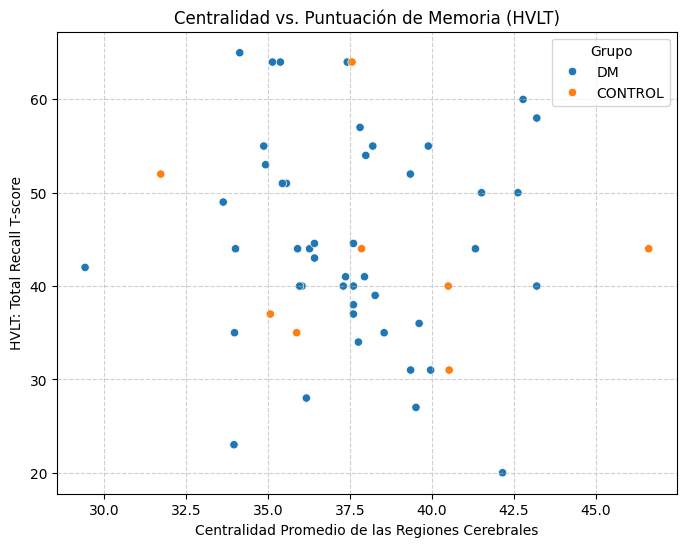

In [71]:
#Vínculo Cognitivo e Interpretación

# 4.1 Preparación de Métricas de Red por Sujeto (Para Correlación)
# Necesitamos una métrica de red POR SUJETO. Usaremos la centralidad promedio
# de las variables cerebrales de cada sujeto como su "puntuación de red".

# Cálculo de la Centralidad Promedio por Sujeto (Simplificación)
# Nota: Esto es un enfoque simplificado. Un análisis más riguroso usaría
# Centrality por nodo y un modelo predictivo.
df_analysis['Avg_Brain_Centrality'] = df_analysis[brain_cols].mean(axis=1)

# 4.2 Correlación entre Red y Cognición (General)
print("Correlación entre Red (Centralidad Promedio) y Cognición")

# Calcular la correlación entre la Centralidad Promedio de Cerebro y las métricas cognitivas
for col in cognitive_cols:
    corr = df_analysis['Avg_Brain_Centrality'].corr(df_analysis[col])
    print(f"   - Correlación con '{col}': {corr:.3f}")

# 4.3 Análisis Focalizado (Ejemplo con un Modelo Lineal Simple)
from scipy.stats import ttest_ind

print("Prueba de Hipótesis: Deterioro Cognitivo (T-Test")

# Comparar si la puntuación de Memoria (HVLT) es diferente entre grupos
hvlt_dm = df_DM['HVLT: Total Recall T-score']
hvlt_control = df_CONTROL['HVLT: Total Recall T-score']

# T-Test de dos muestras independientes
t_stat, p_val = ttest_ind(hvlt_dm.dropna(), hvlt_control.dropna(), equal_var=False)

print(f"   - HVLT (Memoria) Promedio Control: {hvlt_control.mean():.2f}")
print(f"   - HVLT (Memoria) Promedio DM: {hvlt_dm.mean():.2f}")
print(f"   - T-Statistic: {t_stat:.3f}, P-Value: {p_val:.5f}")

if p_val < 0.05:
    print("   -> Conclusión: La diferencia en el rendimiento cognitivo es ESTADÍSTICAMENTE SIGNIFICATIVA (p < 0.05).")
else:
    print("   -> Conclusión: No se encontró una diferencia significativa en el rendimiento cognitivo (p ≥ 0.05).")

# 4.4 Visualización de la Correlación Clave
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Avg_Brain_Centrality', y='HVLT: Total Recall T-score', hue='Group', data=df_analysis.reset_index())
plt.title('Centralidad vs. Puntuación de Memoria (HVLT)')
plt.xlabel('Centralidad Promedio de las Regiones Cerebrales')
plt.ylabel('HVLT: Total Recall T-score')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Grupo')
plt.show()

# Conclusiones
De acuerdo a los graficos realizados se puede observar que ciertas areas y perfusiones se ven más afectadas que otras,también con los grafos podemos observar que hay pérdida y debilitamiento de conexiones entre estructuras que son las más afectadas.También hay que resaltar el hecho de que la gráfica de barras nos muestra que hay deosrganización en la red cerebral y varias regiones se ven obligadas a asumir los roles de las regiones afectadas para compensar el trabajo que estas realizaban,los grafos nos enseñan visualmente la pérdida de conexiones y como otras se fortalecen.De acuerdo al último gráfico y los resultados de las pruebas de cognición,la desorganización estructural/vascular puede ser una señal temprana de la enfermedad que aún no ha afectado el rendimiento funcional. El cerebro DM podría estar usando los nodos compensatorios (barras azules en el grafico de barras y las áreas que se ven más conectadas en el grupo DM que en el control en el grafo) para mantener el rendimiento cognitivo por el momento, incluso si la red estructural subyacente ya está fragmentada.